## Time Series ARIMA and Seasonal ARIMA

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 6]
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
import itertools

In [304]:
# Date parsing METHOD 1
data = pd.read_csv('C:\\Users\\Ashlesh B Shetty\\Google Drive\\LaptopOnDrive\\JobSearch\\GitHubRepos\\MachineLearning_Python-R-Tableau\\imagesanddata_backupfiles\\AirPassengers.csv',
                   dtype = {'Passengers':np.int32},
                   parse_dates = ['TravelDate'],
                   infer_datetime_format = True)
data = data.set_index(['TravelDate'], drop = True)
data.info()

# Date parsing METHOD 2 
# dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
# data = pd.read_csv('C:\\Users\\Ashlesh B Shetty\\Google Drive\\LaptopOnDrive\\JobSearch\\GitHubRepos\\MachineLearning_Python-R-Tableau\\imagesanddata_backupfiles\\AirPassengers.csv', 
#                    parse_dates=['TravelDate'], index_col='TravelDate',date_parser=dateparse)

data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
Passengers    144 non-null int32
dtypes: int32(1)
memory usage: 1.7 KB


,Passengers
TravelDate,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [259]:
#Filtering Date when date is in index
data['1949-03-01':'1949-05-01']

,Passengers
TravelDate,
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [260]:
data['1949']

,Passengers
TravelDate,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


<function matplotlib.pyplot.show>

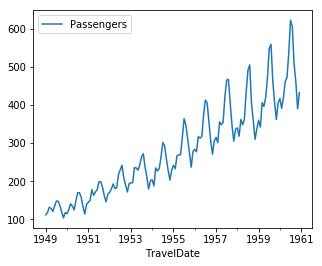

In [261]:
# Check stationarity of a series
plt.rcParams['figure.figsize'] = [5,4]
data.plot()
plt.show

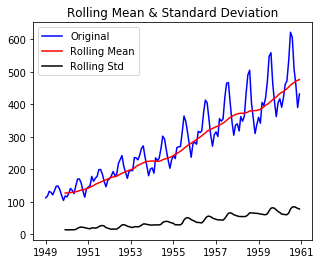

In [262]:
# Plot rolling meand and standard deviation anong with time series plot
rolmean = data.rolling(window=12).mean()
rolstd = data.rolling( window=12).std()

#Plot rolling statistics:
plt.rcParams['figure.figsize'] = [5,4]
orig = plt.plot(data, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [263]:
#test for stationarity
#Perform Dickey-Fuller test:['Test Statistic','p-value','#Lags Used','Number of Observations Used']
print('Results of Dickey-Fuller Test:')
adfuller(data['Passengers'])

Results of Dickey-Fuller Test:


(0.81536887920603984,
 0.99188024343764092,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.5787700591715979,
  '5%': -2.8840418343195267},
 996.69293083901891)

**METHOD 1 Handling Trend and Randomwalk:**  
LSimple way of reducing trend (by applying tranformation which penalising higher valeus  more than smaller : eg. Log)
Identify the trend by linear reg, smmothing, aggregation - we will try smoothing

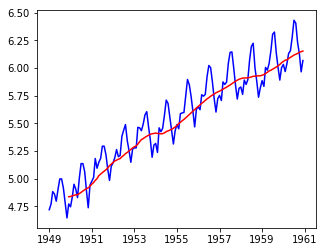

In [264]:
# Simple way of reducing trend (by applying tranformation which penalising higher valeus  more than smaller : eg. Log)
ts_log = np.log(data['Passengers'])

# Identify the trend by linear reg, smmothing, aggregation - we will try smoothing
# MOVING AVERAGE
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log, color = 'blue')
plt.plot(moving_avg, color='red')
plt.show()

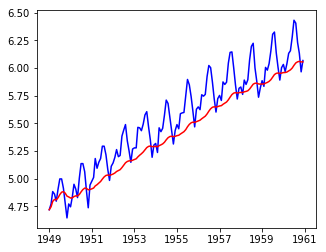

In [265]:
# EXPONENTIAL WEIGHTED MOVING AVERAGE
expwighted_avg = ts_log.ewm( halflife=12).mean()
plt.plot(ts_log, color = 'blue')
plt.plot(expwighted_avg, color='red')
plt.show()

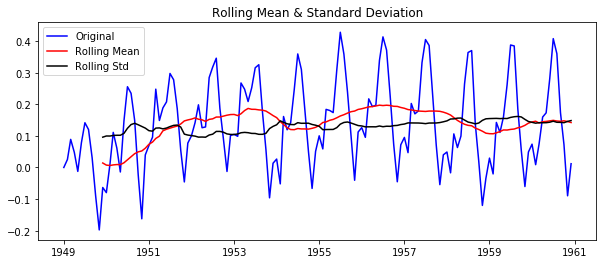

In [266]:
#Plotting after removing trend
ts_log_ewma_diff = ts_log - expwighted_avg
rolmean = ts_log_ewma_diff.rolling(window=12).mean()
rolstd = ts_log_ewma_diff.rolling( window=12).std()

#Plot rolling statistics:
plt.rcParams['figure.figsize'] = [10,4]
orig = plt.plot(ts_log_ewma_diff, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [267]:
print('Results of Dickey-Fuller Test:')
adfuller(ts_log_ewma_diff)

Results of Dickey-Fuller Test:


(-3.6012624201616767,
 0.0057369388015118764,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.5787700591715979,
  '5%': -2.8840418343195267},
 -462.82416324831991)

Other way of handling trend and random walk is by differencing

**METHOD 2 Handling Trend and Randomwalk:**  
Differencing 
Decomposition

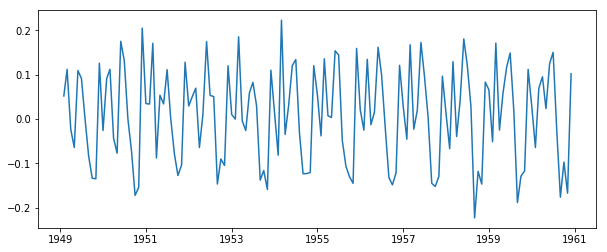

(-2.7171305983881475,
 0.071120548150856291,
 14,
 128,
 {'1%': -3.4825006939887997,
  '10%': -2.5789601977539061,
  '5%': -2.8843979841613772},
 -440.35846985568094)

In [268]:
#differencing
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.show()
adfuller(ts_log_diff.dropna())

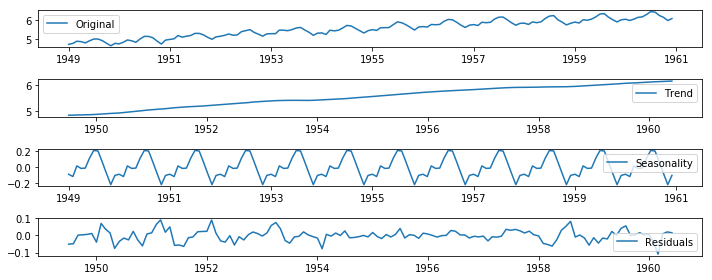

In [269]:
# Decomposition
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

(-6.3323867976448653,
 2.8850589033233949e-08,
 9,
 122,
 {'1%': -3.4851223522012855,
  '10%': -2.5795685622144586,
  '5%': -2.88553750045158},
 -517.26429694037893)

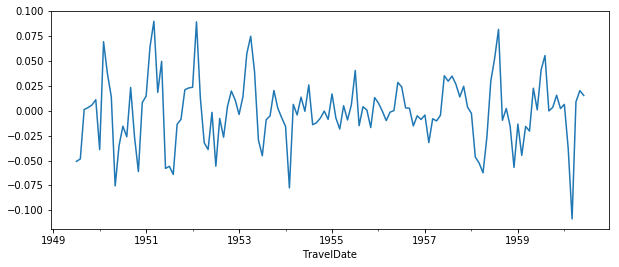

In [270]:
plt.rcParams['figure.figsize'] = [10,4]
residual.plot()
adfuller(residual.dropna())

**ACF and PACF**

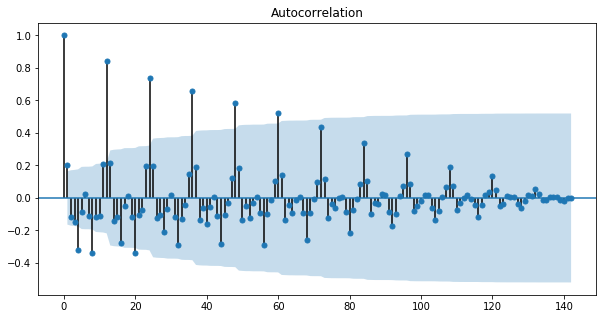

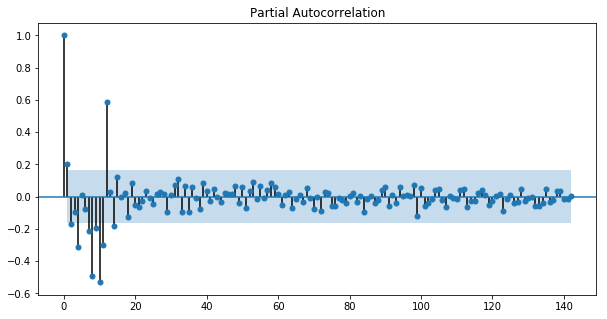

In [271]:
# ACF and PACF
ts_log_diff.dropna(inplace=True)
plt.rcParams['figure.figsize'] = [10,5]
plot_acf(ts_log_diff)
plot_pacf(ts_log_diff)
plt.show()

**ARIMA**

RMSE 2.8588903562088644e-06 



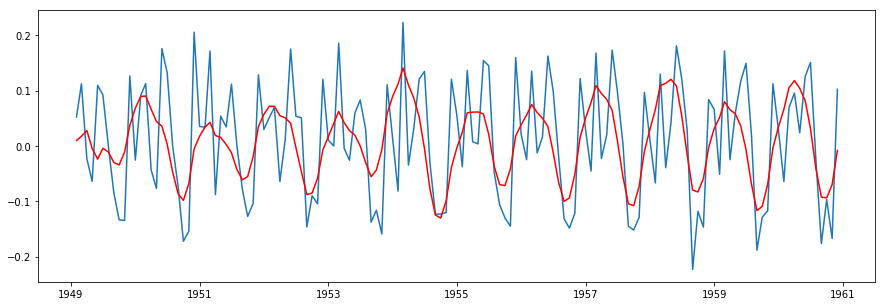

In [326]:
# ARIMA
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
print("RMSE {} \n".format(np.mean(results_ARIMA.fittedvalues-ts_log_diff)**2))

plt.rcParams['figure.figsize'] = [15,5]
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.show()

RMSE 5542.3066674324655 



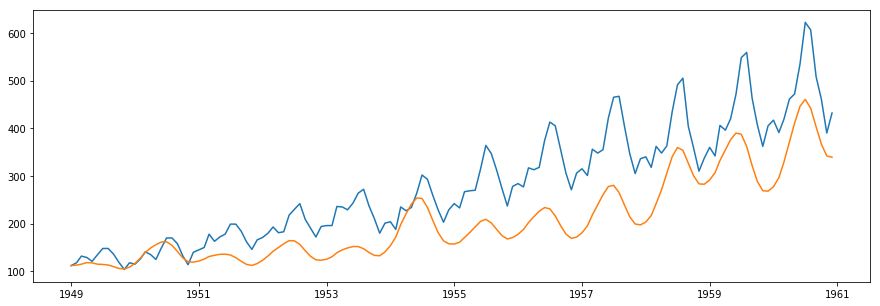

In [327]:
# Bringing back to original scale and calculating the error
#Since it is a ARIMA process the fiited value we get is difference between the ts and lag of ts. 
#We will have to take a cumsum of differences. 
#Then every element in the resulting series will be added to firstelement of our tru time series
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

# If you had taken log before arima you will have to do the below otherwise not needed
predictions_ARIMA = np.exp(predictions_ARIMA_log)

# Print RMSE
print("RMSE {} \n".format(np.mean(predictions_ARIMA-data['Passengers'] )**2))
plt.clf()
plt.rcParams['figure.figsize'] = [15,5]
plt.plot(data)
plt.plot(predictions_ARIMA)
plt.show()

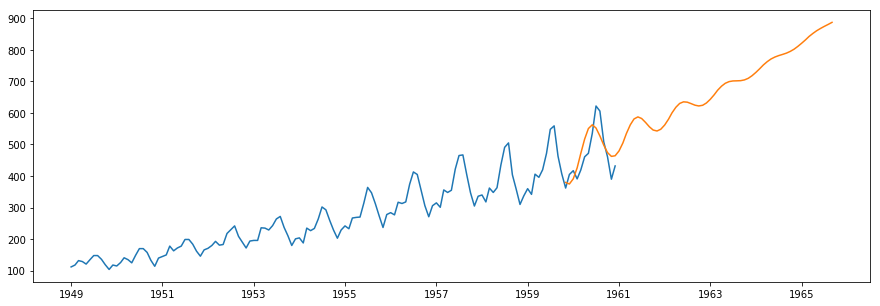

In [337]:
# Forecasting using ARIMA
prediction = results_ARIMA.predict(start = 130, end= 200, typ = "levels",dynamic= True)
predictions_ARIMA = np.exp(prediction)
plt.rcParams['figure.figsize'] = [15,5]
plt.plot(data)
plt.plot(predictions_ARIMA)
plt.show()

**Seasonal ARIMA**

In [333]:
mod = SARIMAX(data, trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -513.064
Date:                            Thu, 19 Apr 2018   AIC                           1032.128
Time:                                    12:39:24   BIC                           1041.037
Sample:                                01-01-1949   HQIC                          1035.748
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.4437      0.527     -0.842      0.400      -1.477       0.589
ma.S.L12       0.2738      0.572      0.478      0.632      -0.848       1.396
sigma2       147.1838     12.321     11.945      0.000     123.034     171.334
===================================================================================
Ljung-Box (Q):                       71.16   Jarque-Bera (JB):                33.76
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.69   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

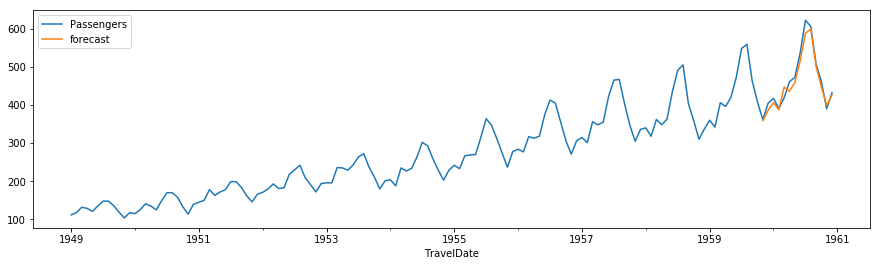

In [334]:
#Forecast using model built from SARIMA
forecastingdata = data.copy()
forecastingdata['forecast'] = results.predict(start = 130, end= 144, typ = 'levels', dynamic= True)  
plt.rcParams['figure.figsize'] = [15,4]
forecastingdata[['Passengers', 'forecast']].plot()
plt.show()

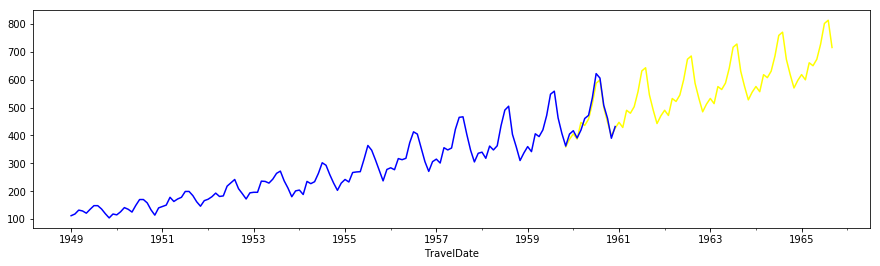

In [335]:
results.predict(start = 130, end= 200, type = 'levels',dynamic= True).plot(color = 'yellow')
forecastingdata['Passengers'].plot(color = 'blue')